In [ ]:
import numpy as np
import pandas as pd

from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Abnormal"]
data = pd.read_csv('CVD_combined.csv',sep=',')
data.head()

,age,gender,height,weight,resting_blood_pressure,cholesterol,blood_sugar,alcohol,cad_history,stroke_history,peripheral_heart_disease,chest_pain_type,exercise_induced_angina,max_heart_rate,st_peak,t_wave_inversion,condition
0,39,1,178.0,63,130,134,0,0,0,0,0,3,0,157,1,0,0
1,42,1,188.0,106,130,173,0,0,0,0,0,3,0,171,1,0,0
2,43,1,170.0,90,140,140,0,0,0,0,0,3,0,166,1,0,0
3,72,1,178.0,75,160,175,0,0,0,0,0,3,0,131,1,0,0
4,47,1,163.0,68,130,120,0,0,0,0,0,3,0,139,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       143 non-null    int64  
 1   gender                    143 non-null    int64  
 2   height                    143 non-null    float64
 3   weight                    143 non-null    int64  
 4   resting_blood_pressure    143 non-null    int64  
 5   cholesterol               143 non-null    int64  
 6   blood_sugar               143 non-null    int64  
 7   alcohol                   143 non-null    int64  
 8   cad_history               143 non-null    int64  
 9   stroke_history            143 non-null    int64  
 10  peripheral_heart_disease  143 non-null    int64  
 11  chest_pain_type           143 non-null    int64  
 12  exercise_induced_angina   143 non-null    int64  
 13  max_heart_rate            143 non-null    int64  
 14  st_peak   

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["condition"]]
# Store the variable we are predicting 
target = "condition"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(143, 16)
(143,)


In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

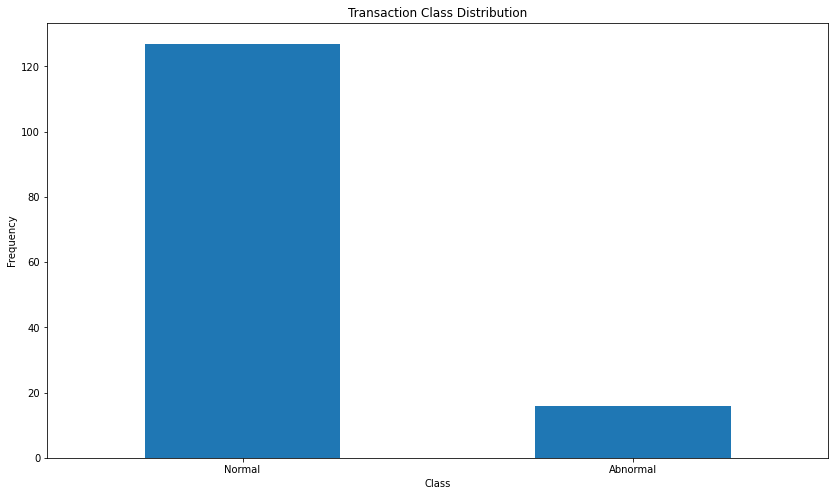

In [ ]:
count_classes = pd.value_counts(data['condition'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset 

fraud = data[data['condition']==1]

normal = data[data['condition']==0]

print(fraud.shape,normal.shape)

(16, 17) (127, 17)


In [ ]:
data['condition'].value_counts()

0    127
1     16
Name: condition, dtype: int64

In [ ]:
#### Independent and Dependent Features
X=data.drop("condition",axis=1)
y=data.condition

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

Undersampling

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 88, 1: 12})

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 88, 1: 12})
The number of classes after fit Counter({0: 15, 1: 12})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[39  0]
 [ 0  4]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 88, 1: 12})
The number of classes after fit Counter({0: 88, 1: 66})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[39  0]
 [ 0  4]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



SMOTE  :

In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 88, 1: 12})
The number of classes after fit Counter({0: 83, 1: 61})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[39  0]
 [ 0  4]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

